# Bitcoin Price Prediction

##### Feito por: Henrique, Omar, Nevton

### Introdução
#### As criptomoedas estão ganhando cada vez mais espaço no mercado financeiro. Muitos dizem que as criptomoedas não passam de uma bolha especulativa, porém mesmo após uma forte queda em 2018, Os preços desse ativo em geral se manteve em um patamar relevante. Devido a alta volatilidade achamos que seria interessante fazer uma análise preditiva sobre o preço dos ativos uma vez que com grande volartilidade existem maiores oportunidades para se ganhar dinheiro. Escolhemos fazer apenas com Bitcoin, pois é a primeira, maior e principal criptomoeda.  
#### Dessa forma nosso objetivo era criar um modelo para tentar prever o preço do bitcoin, para a partir disso tomar decisões de investimento. Para fazer isso, primeiramente coletamos diversas variáveis sobre a rede do Bitcoin, nos ultimos 5 anos. Essas informações podem ser achadas no link: https://www.blockchain.com/charts. E relacionamos essas variáveis com nossa variável chave que era market_price2 (preço em dólares)
#### Nossa pergunta motriz foi: Qual vai ser o preço do Bitcoin no futuro?

#### Para responder essa pergunta fizemos um regressão multipla e também usamos um método chamado Decision Tree Regressor

In [1]:
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
dfs = pd.read_excel('DataFrame_bitcoin.xlsx')
data = pd.read_csv('difficulty.csv')

### Gráfico de como o preço do bitcoin se comportou de 2014 até agora

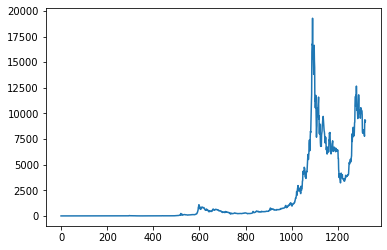

In [3]:
plt.plot(dfs['market_price_2'])

### Análise exploratória
Primeiramente foi feito uma análise exploratória dos dados. Dados que estamos cruzando variáveis quantitativas o melhor método para vizualizarmos é com um scatter plot. Por termos um número grande de variáveis, primeiro fizemos uma tabela de correlação e analisamos, através do scatter plot, apenas as variáveis que mais se correlacionavam com nossa variável de interrese: 'Market_price_2'

In [4]:
tabela_corr = dfs.corr()
tabela_corr

,avg_block_size,cost_per_transaction_percent,cost_per_transaction,difficulty,estimated_transaction_volume_usd,hash_rate,market_cap,market_price_2,miners_revenue,n_transactions_excluding_popular,n_transactions,output_volume,total_bitcoins,transaction_fees
avg_block_size,1.000000,-0.051597,0.529394,0.636240,0.661933,0.626424,0.702011,0.702377,0.665177,0.971450,0.972875,0.259226,0.853095,0.515961
cost_per_transaction_percent,-0.051597,1.000000,-0.038664,-0.023245,-0.025296,-0.023179,-0.027506,-0.028073,-0.028579,-0.048561,-0.051035,-0.033656,-0.091230,-0.025885
cost_per_transaction,0.529394,-0.038664,1.000000,0.559057,0.738785,0.569977,0.857025,0.867885,0.881768,0.494602,0.500931,0.033923,0.550975,0.402727
difficulty,0.636240,-0.023245,0.559057,1.000000,0.530863,0.992881,0.786755,0.769127,0.684650,0.628557,0.637798,0.022962,0.503553,0.073641
estimated_transaction_volume_usd,0.661933,-0.025296,0.738785,0.530863,1.000000,0.531814,0.876827,0.884338,0.911858,0.661108,0.670106,0.138356,0.492783,0.682271
hash_rate,0.626424,-0.023179,0.569977,0.992881,0.531814,1.000000,0.789750,0.772287,0.698649,0.631557,0.640881,0.020669,0.502001,0.077810
market_cap,0.702011,-0.027506,0.857025,0.786755,0.876827,0.789750,1.000000,0.999379,0.976817,0.683876,0.693548,0.082127,0.556133,0.472432
market_price_2,0.702377,-0.028073,0.867885,0.769127,0.884338,0.772287,0.999379,1.000000,0.980881,0.683373,0.692805,0.084028,0.560533,0.487465
miners_revenue,0.665177,-0.028579,0.881768,0.684650,0.911858,0.698649,0.976817,0.980881,1.000000,0.666400,0.676036,0.091096,0.545469,0.564392
n_transactions_excluding_popular,0.971450,-0.048561,0.494602,0.628557,0.661108,0.631557,0.683876,0.683373,0.666400,1.000000,0.995444,0.259574,0.823252,0.540150


### Como podemos ver as variáveis que apresentam a correlação mais forte com o market price (preço) são:  
-miners_revenue  
-Dificuldade  
-Hash_rate<br>
-Market_Cap<br>
-Volume Estimado Da Transacao<br>
#### Agora vamos analisar mais a fundo essas relações

Text(0, 0.5, 'remuneração dos mineradores')

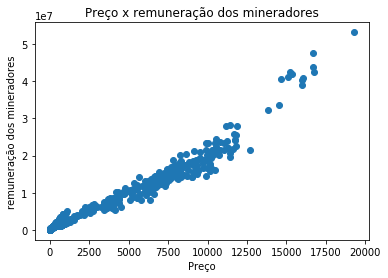

In [5]:
plt.scatter(dfs["market_price_2"],dfs["miners_revenue"])
plt.title('Preço x remuneração dos mineradores')
plt.xlabel('Preço')
plt.ylabel('remuneração dos mineradores')

Notasse uma forte correlação positiva

Text(0, 0.5, 'Dificuladade')

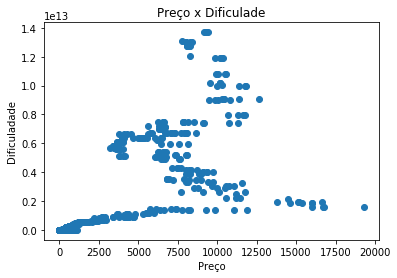

In [6]:
plt.scatter(dfs["market_price_2"],dfs["difficulty"])
plt.title('Preço x Dificulade')
plt.xlabel('Preço')
plt.ylabel('Dificuladade')

Podemos ver que quanto mais difícil é para minerar um bloco maior o preço

Text(0, 0.5, 'Hash Rate')

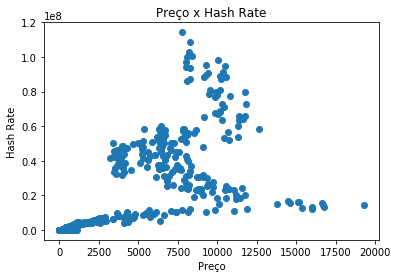

In [7]:
plt.scatter(dfs["market_price_2"],dfs["hash_rate"])
plt.title('Preço x Hash Rate')
plt.xlabel('Preço')
plt.ylabel('Hash Rate')

A relação é muito parecida com a descrita a cima. Ao fazer uma análise mais profunda sobre os conceitos intrincecos dessas duas variáveis, percebe-se que no fundo o hash rate e a dificuldade são quase a mesma coisa.  
Pode-se encontrar mais informações sobre esses conceitos em : https://2miners.com/blog/mining-difficulty-and-network-hashrate-explained/

Text(0, 0.5, 'Market_Cap')

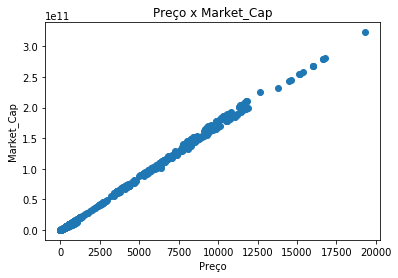

In [8]:
plt.scatter(dfs["market_price_2"],dfs["market_cap"])
plt.title('Preço x Market_Cap')
plt.xlabel('Preço')
plt.ylabel('Market_Cap')

O market cap se mostrou muito relacionado com o preço, porém ao analisar o que a variável significa, concluimos que o market cap é um desdobramento do preço. Formula para se achar o market cap = Preço * quantidade de moedas em circulação. Por isso vamos excluir essa variável para fazer as regressões

Text(0, 0.5, 'Volumne Estimado Da Transacao')

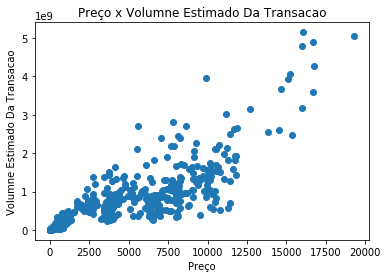

In [9]:
plt.scatter(dfs["market_price_2"],dfs["estimated_transaction_volume_usd"])
plt.title('Preço x Volumne Estimado Da Transacao')
plt.xlabel('Preço')
plt.ylabel('Volumne Estimado Da Transacao')

Podemos observar uma correlacão forte positiva, ou seja, quanto maior o volume de transações maior o preço. Isso nos indica que se a rede esta mais ativa, mais pessoas querendo transacionar, o preco tende a aumentar

In [10]:
df_treinamento = dfs.iloc[550:991]
df_teste = dfs.iloc[991:]

In [11]:
Y_treinamento = df_treinamento['market_price_2']
X_treinamento = df_treinamento[[
 'avg_block_size',
 'cost_per_transaction',
 'difficulty',
 'estimated_transaction_volume_usd',
 'hash_rate',
 'miners_revenue',
 'n_transactions',
 'transaction_fees'
]]
Y_teste = df_teste['market_price_2']
X_teste = df_teste[[
 'avg_block_size',
 'cost_per_transaction',
 'difficulty',
 'estimated_transaction_volume_usd',
 'hash_rate',
 'miners_revenue',
 'n_transactions',
 'transaction_fees'
]]

## Fazendo a Regressão linear multipla

A regressão linear multipla é um conjunto de técnicas estatísticas a fim de construir modelos que possam descrever de maneira razoável relações entre várias variáveis explicativas de um determinado processo. Chamamos de Regressão linear multipla por usarmos varias variaveis.

Para fazer a regressão dividimos o dataframe em 2, sendo o primeiro para treinar o modelo e o segundo para verificar a acurrácia desse

In [12]:
#Funcao Que Calcula A Regressao Linear Multipla
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [13]:
#Funcao Que Calcula O Valor RMS
def rms(y,y_pred):
    return (sum((y-y_pred)**2)*1/len(y))**0.5

In [14]:
regress(X_treinamento,Y_treinamento).summary()

C:\Users\nevton\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         market_price_2   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     748.6
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          9.30e-248
Time:                        23:47:35   Log-Likelihood:                -2419.4
No. Observations:                 441   AIC:                             4857.
Df Residuals:                     432   BIC:                             4894.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               47.7445     12.490      3.823      0.000      23.196      72.293
avg_block_size                      98.4446     51.533      1.910      0.057      -2.843     199.732
cost_per_transaction                 7.0955      0.696     10.199      0.000       5.728       8.463
difficulty                         2.18e-09      3e-10      7.268      0.000    1.59e-09    2.77e-09
estimated_transaction_volume_usd  6.816e-07   7.82e-08      8.721      0.000    5.28e-07    8.35e-07
hash_rate                         -3.73e-05   3.85e-05     -0.968      0.333      -0.000    3.84e-05
miners_revenue                    8.479e-05   1.19e-05      7.105      0.000    6.13e-05       0.000
n_transactions                      -0.0010      0.000     -4.568      0.000      -0.001      -0.001
transaction_fees                    -0.0617      0.114     -0.543      0.587      -0.285       0.162
==============================================================================
Omnibus:                       23.580   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.306
Skew:                          -0.463   Prob(JB):                     2.63e-07
Kurtosis:                       3.889   Cond. No.                     2.53e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Em nossa primeira regressão obtivemos um r-squared de 93.3%, ou seja, nosso modelo se ajusta aos pontos em 93.3% dos casos.

#### Neste primeiro modelo, no entanto estamos apenas usando os dados de um dia atrás, o que torna nosso modelo muito simples e falho. Dessa forma vamos varias a janela temporal usada para verificar qual a melhor janela de tempo para se usar

In [15]:
n = len(Y_treinamento)
lista = []
dias = []
for i in range(20):
    Y_offset = Y_treinamento.values[i:]
    X_offset = X_treinamento.values[:(n-i),:]
    results = regress(X_offset,Y_offset)
    lista.append(results)
    dias.append(i)
    print(i, results.rsquared)

0 0.9327212576061571
1 0.9205333154872035
2 0.9084978141927923
3 0.8815944558628371
4 0.8657582152408423
5 0.8408520179050445
6 0.8216158664641344
7 0.7951816800062375
8 0.7826987783703702
9 0.7662946723835308
10 0.7489807326815632
11 0.7344752754434607
12 0.715845870257084
13 0.7052632422829841
14 0.6844160858433044
15 0.6686160395877396
16 0.653922553883097
17 0.6398518975452274
18 0.6219755326170945
19 0.6034658465865538


#### Decidimos fazer a analise usando 10 períodos anteriores, uma vez que analisando até 200 períodos esse foi com maior precisão, ainda sim usando dados anteriores

In [16]:
i = 10
Y_offset1 = Y_treinamento.values[i:]
X_offset1 = X_treinamento.values[:(n-i),:]
modelo = regress(X_offset1,Y_offset1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     157.4
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          1.48e-121
Time:                        23:47:38   Log-Likelihood:                -2640.2
No. Observations:                 431   AIC:                             5298.
Df Residuals:                     422   BIC:                             5335.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6934     23.898      5.594      0.000      86.720     180.667
x1          -214.1603     99.475     -2.153      0.032    -409.689     -18.632
x2            11.7205      1.337      8.764      0.000       9.092      14.349
x3          2.334e-09   6.04e-10      3.866      0.000    1.15e-09    3.52e-09
x4          7.948e-07    1.5e-07      5.308      0.000       5e-07    1.09e-06
x5         -2.935e-05   7.72e-05     -0.380      0.704      -0.000       0.000
x6         -4.368e-05   2.31e-05     -1.891      0.059   -8.91e-05    1.72e-06
x7             0.0002      0.000      0.556      0.578      -0.001       0.001
x8             0.3974      0.221      1.798      0.073      -0.037       0.832
==============================================================================
Omnibus:                      236.206   Durbin-Watson:                   0.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2106.913
Skew:                           2.197   Prob(JB):                         0.00
Kurtosis:                      12.900   Cond. No.                     2.30e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X_test_c = sm.add_constant(X_teste1)
y_pred=modelo.predict(X_test_c)
print("R2  =",r2_score(Y_teste, y_pred))
print("RMS =",rms(Y_teste, y_pred))

R2  = -5.292560144925089
RMS = 8705.627809024503


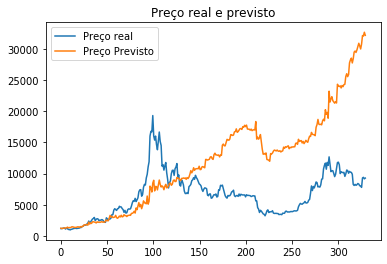

In [20]:
lista = np.linspace(0, 329, 329)
plt.title('Preço real e previsto')
plt.plot(lista,Y_teste, label='Preço real')
plt.plot(lista,y_pred, label = 'Preço Previsto')
plt.legend()

Como podemos analisar no resultado da regressão tivemos algumas variáveis com um  valor p acima do nível de significancia (0.05). Isso nos mostra que não é possível ter certeza que essas variáveis influenciam no modelo. No entanto, as varíveis que estão dentro desse nível nos podemos confirmar que são influentes no modelo

In [ ]:
X_treinamento1 = df_treinamento[[
 'avg_block_size',
 'cost_per_transaction',
 'difficulty',
 'estimated_transaction_volume_usd',
]]
X_teste1 = df_teste[[
 'avg_block_size',
 'cost_per_transaction',
 'difficulty',
 'estimated_transaction_volume_usd',
]]

In [ ]:
i = 10
Y_offset1 = Y_treinamento.values[i:]
X_offset1 = X_treinamento1.values[:(n-i),:]
modelo = regress(X_offset1,Y_offset1)
modelo.summary()

Ao tirar as variáveis é possível perceber que não houve melhora na performace do código e por isso usaremos os modelos com mais variáveis

#### Em nossa segunda regressão obtivemos um r-squared de 74.3%, ou seja, nosso modelo se ajusta aos pontos em 74.3% dos casos.

## Fazendo o  Decision Tree Regressor

Uma árvore de decisão é um modelo de machine learning supervisionada, usado para prever um destino, aprendendo regras de decisão a partir de recursos. Como o nome sugere, podemos pensar nesse modelo como quebrar nossos dados, tomando uma decisão com base em fazer uma série de perguntas. O modelo de árvore de decisão aprende uma série de perguntas para inferir os rótulos de classe das amostras.

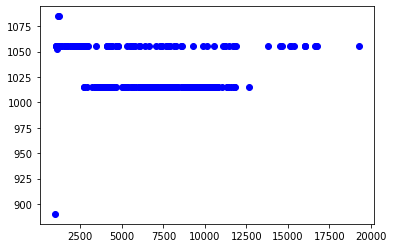

In [21]:
#Decision Tree Regressor
Arvore = DecisionTreeRegressor(random_state = 1)
Arvore.fit(X_treinamento, Y_treinamento)
plt.scatter(Y_teste, Arvore.predict(X_teste), color = 'blue')
plt.show()

In [22]:
y_pred1=Arvore.predict(X_teste)
print("R2  =",r2_score(Y_teste, y_pred1))
print("RMS =",rms(Y_teste, y_pred1))

R2  = -2.502845106849257
RMS = 6495.265007215954


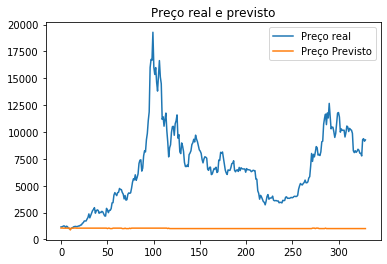

In [23]:
plt.title('Preço real e previsto')
plt.plot(lista,Y_teste, label='Preço real')
plt.plot(lista,y_pred1, label = 'Preço Previsto')
plt.legend()

## Fazendo o Random Forest Regressor

O metodo de regrassao 'Random Forest', se utiliza dos mesmo recursos do 'Decision Tree Regressor', gerando varias arvores de decisao e combinando os resultados, produz geralmente um resultado mais satisfatorio que a decision tree.

C:\Users\nevton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



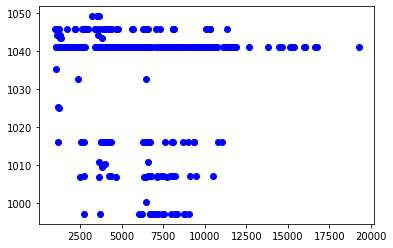

In [28]:
RandomF = RandomForestRegressor(random_state=0)
RandomF.fit(X_treinamento1, Y_treinamento)
plt.scatter(Y_teste, RandomF.predict(X_teste1), color = 'blue')
plt.show()

In [29]:
y_pred2=RandomF.predict(X_teste1)
print("R2  =",r2_score(Y_teste, y_pred2))
print("RMS =",rms(Y_teste, y_pred2))

R2  = -2.496952887123331
RMS = 6489.799787466401


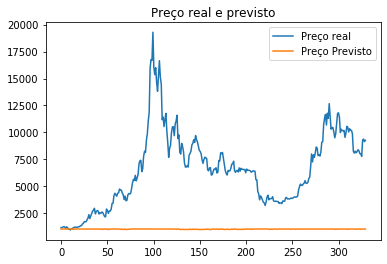

In [30]:
plt.title('Preço real e previsto')
plt.plot(lista,Y_teste, label='Preço real')
plt.plot(lista,y_pred2, label = 'Preço Previsto')
plt.legend()

## Conclusão

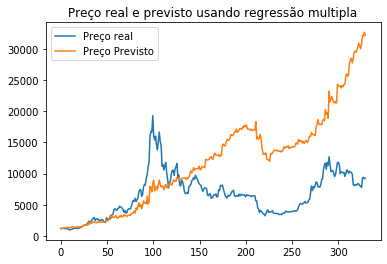

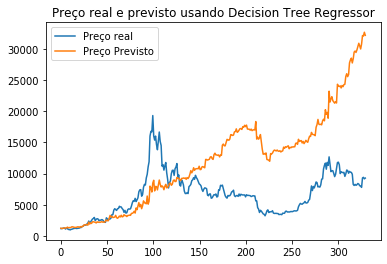

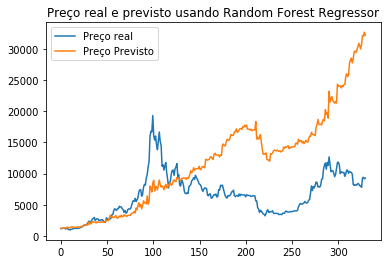

In [31]:
plt.title('Preço real e previsto usando regressão multipla')
plt.plot(lista,Y_teste, label='Preço real')
plt.plot(lista,y_pred, label = 'Preço Previsto')
plt.legend()
plt.show()
plt.title('Preço real e previsto usando Decision Tree Regressor')
plt.plot(lista,Y_teste, label='Preço real')
plt.plot(lista,y_pred, label = 'Preço Previsto')
plt.legend()
plt.show()
plt.title('Preço real e previsto usando Random Forest Regressor')
plt.plot(lista,Y_teste, label='Preço real')
plt.plot(lista,y_pred, label = 'Preço Previsto')
plt.legend()
plt.show()

Como podemos ver o método de previsão que chegou mais perto de prever o preço foi a regressão múltipla. Mesmo assim é possível perceber que todos os modelos são muito falhos e apresentam grande erro ao mostrar a realidade.
Ao nos depara com esse resultado tentamos fazer diversas iteração para tentar melhorar o modelo, porém todas se mostraram falhas.
Após fazer uma análise, concluimos algumas razões que podem explicar os resultados.  
-A dinamica do bitcoin mudou muito de 2014 pra cá, houve uma mudança de cenário e paradigma na cripto economia e, por isso, os dados do passado podem não se aplicar para explicar o presente  
-Por ser um mercado muito especulativo, as variáveis técnicas que dizem respeito a saúde da rede blockchain podem não ter tanta importância no seu valor final  
Pensamos que para próximas iteraões poderíamos fazer uso de um naive-bayes, do mesmo jeito que foi feito no projeto 2, para fazer uma análise sentimental em diversos portais de noticias e fóruns. Dessa forma poderíamos saber o que as pessoas estão achando e a partir disso concluir se o preço do ativo vai cair ou subir

## Referencias Bibliograficas

https://www.blockchain.com/charts

https://changelly.com/blog/bitcoin-price-prediction-2019-2025-2030/